<p>Department Of Computer Science

COMP432, COMPUTER SECURITY

Dr. Mohammad Alkhanafse

Section 2

</p>

<div align="center">

<img src="https://github.com/sondosaabed/Introducing-Generative-AI-with-AWS/assets/65151701/01485d19-c6d6-4072-99d7-178ea8ec4364" alt="Birzeit University Logo" height="170px">


# Iris eye Recognition

</div>
<div align="center">
An (End-to-end Identification) Biometric Authentication system using Iris

</div>

<b>Prepared by:</b> Sondos Aabed

<b>Studnet ID:</b> 1190652

<hr>

## Abstract

In this project, a Biometric Authentication system using the Iris biometric authentication method is design.

<hr>

## Table of Contents
- Introduction
    - About Dataset Used
    - Aim and Objectives
    - Methodology
- Theory
- Software Listing
- Implementation
    - Dataset Analysis
    - Data Modeling
    - GUI
- Conclusion
- Refrences

## List of Figures
- Figure: IRis dataset collection device IKEMB-100 camera 
- Figure: Figure: Data Sample from IRIS CaSIA
- Figure: Ramndom Small sample of the dataset
- Figure: Distribution of Image Sizes
- Figure: Distribution of Aspect Ratios
- Figure: Labels Frequency Treemap
- Figure: Preprocessed image sample

## List of Tables
- Table 1: Software Listenings
- Table 3: Dataset Head
- Table 4: Dataset Tail
- Table 5: Dataset Numerical Describtion
- Table 6: Missing Values By Percentage
- Table 7: Dataset Columns Data types
- Table 8: Number of uniques in the datasets
- Table 9: Labels Distribution

<hr>

## Introduction

The Iris-Recongtion has been widely used in identication, for many resons : [1]
1. `Unique:` there are not any iris having the same physical characteristic as others, even if they come from the same person or identical twins; 
2. `Stability:` the iris is formed during childhood, and it generally maintains unchangeable physical characteristics throughout life; 
3. `Informative:` the iris has rich texture information such as spots, stripes, laments and coronas.
4. `Safety:` Since the iris is located in a circular area under the surface of the eye between the black pupil and the white sclera, it is rarely disturbed by external factors. As a result, it is dicult to forge the iris pattern; 
5. `Contactless:` Iris Recognition (IR) is more hygienic than biometrics that requires contact, such as fngerprint recognition.
 

### About Dataset used

CASIA-Iris-Thousand contains 20,000 iris images from 1,000 subjects, which were collected using IKEMB-100 camera (Figure ) produced by IrisKing. IKEMB-100 is a dual-eye iris camera with friendly visual feedback, realizing the effect of “What You See Is What You Get”. The bounding boxes shown in the frontal LCD help users adjust their pose for high-quality iris image acquisition. The main sources of intra-class variations in CASIA-Iris-Thousand are eyeglasses and specular reflections. Since CASIA-Iris-Thousand is the first publicly available iris dataset with one thousand subjects, it is well-suited for studying the uniqueness of iris features and develop novel iris classification and indexing methods.

<div align="center">
    <p>Figure: IRis dataset collection device IKEMB-100 camera [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.8.jpg" alt="Iris collection device"/>
    <p>Figure: Data Sample from IRIS CaSIA [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.9.jpg" alt="Data sample"/>
</div>

<hr>

### Aim and Objectives

- To design a biometric based authentication system.
- To perform data analysis on Iris Dataset
- To perfrom data modeling as a user recognition task (Verifier Module) 
- To build an enrollment module (Enrollment Module)

<hr>

### Problem Statemnet

- This is a classification problem where we have mutli persons each have left eye or right eyes Iris. Mainly teh dataset contains 1000 persons with Iris images of the Left and the Right eye. In total there is 2000 unique labels, with sampling there will be 1400 unique labels.

### Methodogly 

The approach in this implenetauion, is an  End-to-end segmentaion free approach using deep learning for identifiation of Iris. Where a base model is used as the Feature extractor and the Dense softmax are used for the classification task.

<hr>

## Theory

<hr>

## Software Listing

In this project many tools were used and utilized. The followning table shows the software tools and versions used in this project.

Table 1: Software Listenings

| Tools   | Version   |
|-------|-----------|
|Python|3.12.2|
| pandas | 2.2.2 |
| numpy    | 1.26.4 |
| Pillow (PIL) | 9.5.0 |
| TensorFlow | 2.15.0 |
| OpenCV (cv2) | 4.9.0 |
| Keras (TensorFlow) | updated |
| matplotlib   | updated |
| scikit-learn | updated |
| squarify | updated |
|Visual Studio Code| Updated|
|Git & github| https://github.com/sondosaabed/Iris-of-eyes-recognition|

<hr>

## Implemetation

In this section, the aim and objectives are met and presented. First the dataset is looked into and decisions are made based on that, then the model archeiticure is prepared and finally the enrollment module is used and the model is integrated into it.

<hr>

Necceary imports

In [1]:
## Visualization, sampling and data loading
import squarify 
import os
import PIL
import math
import cv2
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data modeling
import tensorflow as tf
from keras import Model,  Sequential
from sklearn.model_selection import cross_val_score
from keras import backend as K
from tensorflow import keras as keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from keras.layers import InputLayer,Activation,Dense,Dropout, Conv2D, BatchNormalization, Flatten, MaxPool2D, Input, Reshape, Concatenate, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Softmax, LeakyReLU

2024-05-08 23:50:53.836566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 23:50:53.836677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 23:50:54.102723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Dataset Analysis

#### Loading Dataset
In this section the dataset files and laels are loaded into a pandas dataframe.

In [2]:
def load_dataset(path):
    """
    Loading the dataset into a pandas datframe.
    The images of CASIA-Iris-Thousand are stored as:    /CASIA-Iris-Thousand/YYY/E/S5YYYENN.jpg

        YYY: the unique identifier of the subject in the subset
        E: ‘L’ denotes left eye and ‘R’ denotes right eye
        NN: the index of the image in the class
    
    Args:
        path(str): string that has the path of the dataset
    Returns:
        df(pd.DataFrame): the loaded dataframe
    """
    labels = []
    images = []

    for folder in os.listdir(path):
        for lr in os.listdir(path+'/'+folder): #left or right
            for image in os.listdir(path+'/'+folder+'/'+lr):
                if image.endswith('b') is False:
                    images.append(path+'/'+folder+'/'+lr+'/'+image)
                    labels.append(folder+'-'+lr) #+'-'+lr

    df = pd.DataFrame(list(zip(labels, images)), columns=['Label', 'ImagePath'])
    return df, labels, images

In [3]:
df, labels, images = load_dataset('/kaggle/input/casia-iris-thousand/CASIA-Iris-Thousand')

#### Expolring Dataset
This section includes looking into the visulaization, distributions, checking for missing and duplicates values. 

In [4]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': (missing_count.values / len(df)) * 100  
    })
    return  missing_percetanges

In [5]:
def explore_data(df):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(df.head())
    tail = pd.DataFrame(df.tail())
    nunique = pd.DataFrame(df.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(df.describe())
    dtypes =  pd.DataFrame(df.dtypes, columns=["Datatype"])
    labels_distribution = pd.DataFrame(df['Label'].value_counts())
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(df), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique,
        'Table 9: Labels Distribution:':labels_distribution}
    return results

In [6]:
def print_dataset_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [7]:
print_dataset_exploration(explore_data(df))

Table 3: Dataset Head:


Label                                          ImagePath
0  437-R  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
1  437-R  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
2  437-R  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
3  437-R  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
4  437-R  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...

Table 4: Dataset Tail:


Label                                          ImagePath
19995  715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19996  715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19997  715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19998  715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19999  715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...

Table 5: Dataset Numerical Describtion: 


Label                                          ImagePath
count   20000                                              20000
unique   2000                                              20000
top     715-L  /kaggle/input/casia-iris-thousand/CASIA-Iris-T...
freq       10                                                  1

Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  0.0


Column  Counts  Percentage
0      Label       0         0.0
1  ImagePath       0         0.0

Table 7: Dataset Columns Data types: 


Datatype
Label       object
ImagePath   object

Table 8: Number of uniques in the datasets:


#_of_Unique
Label             2000
ImagePath        20000

Table 9: Labels Distribution:


count
Label       
715-L     10
437-R     10
437-L     10
515-R     10
515-L     10
...      ...
768-L     10
642-R     10
642-L     10
057-R     10
057-L     10

[2000 rows x 1 columns]

In this initial data exploration, it is found out that the dataset has two cloumns. The first one contains the label of the Iris image: that label is in the form of (Subject XXX-Y) and the Y could be either left eye or right eye of the same subject. 

The datset was checked for missing values and duplicates. There was no such found. We have 2000 unique labels and 20000 images. The fisrt look into the distribution seems fair, since there is 10 images for that same label.

##### Data Viualization 

now let's take a deeper look into the datset:

- Images Visualizations

In [8]:
def show_random_samples(df, num):
    """
    Shows a sample on the dataframe in a specific location.
    Args:
        df (pd.DataFrame): the dataset
        num (int): the number of random samples to display
    Return:
        Nothing but shows a sample in the display
    """
    random.seed(1190652)
    random_indices = random.sample(range(df.shape[0]), num)
    num_rows = math.ceil(num / 4) 

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))  
    for i, idx in enumerate(random_indices):
        row = i // 4
        col = i % 4
        
        if idx < df.shape[0]:  
            image_path =  df.loc[idx, "ImagePath"]
            image = PIL.Image.open(image_path)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"Image {idx} Person Label: {df.loc[idx, 'Label']}")
            ax.axis("off")

    plt.suptitle("Random Small Sample of the Dataset")
    plt.tight_layout()
    plt.show()

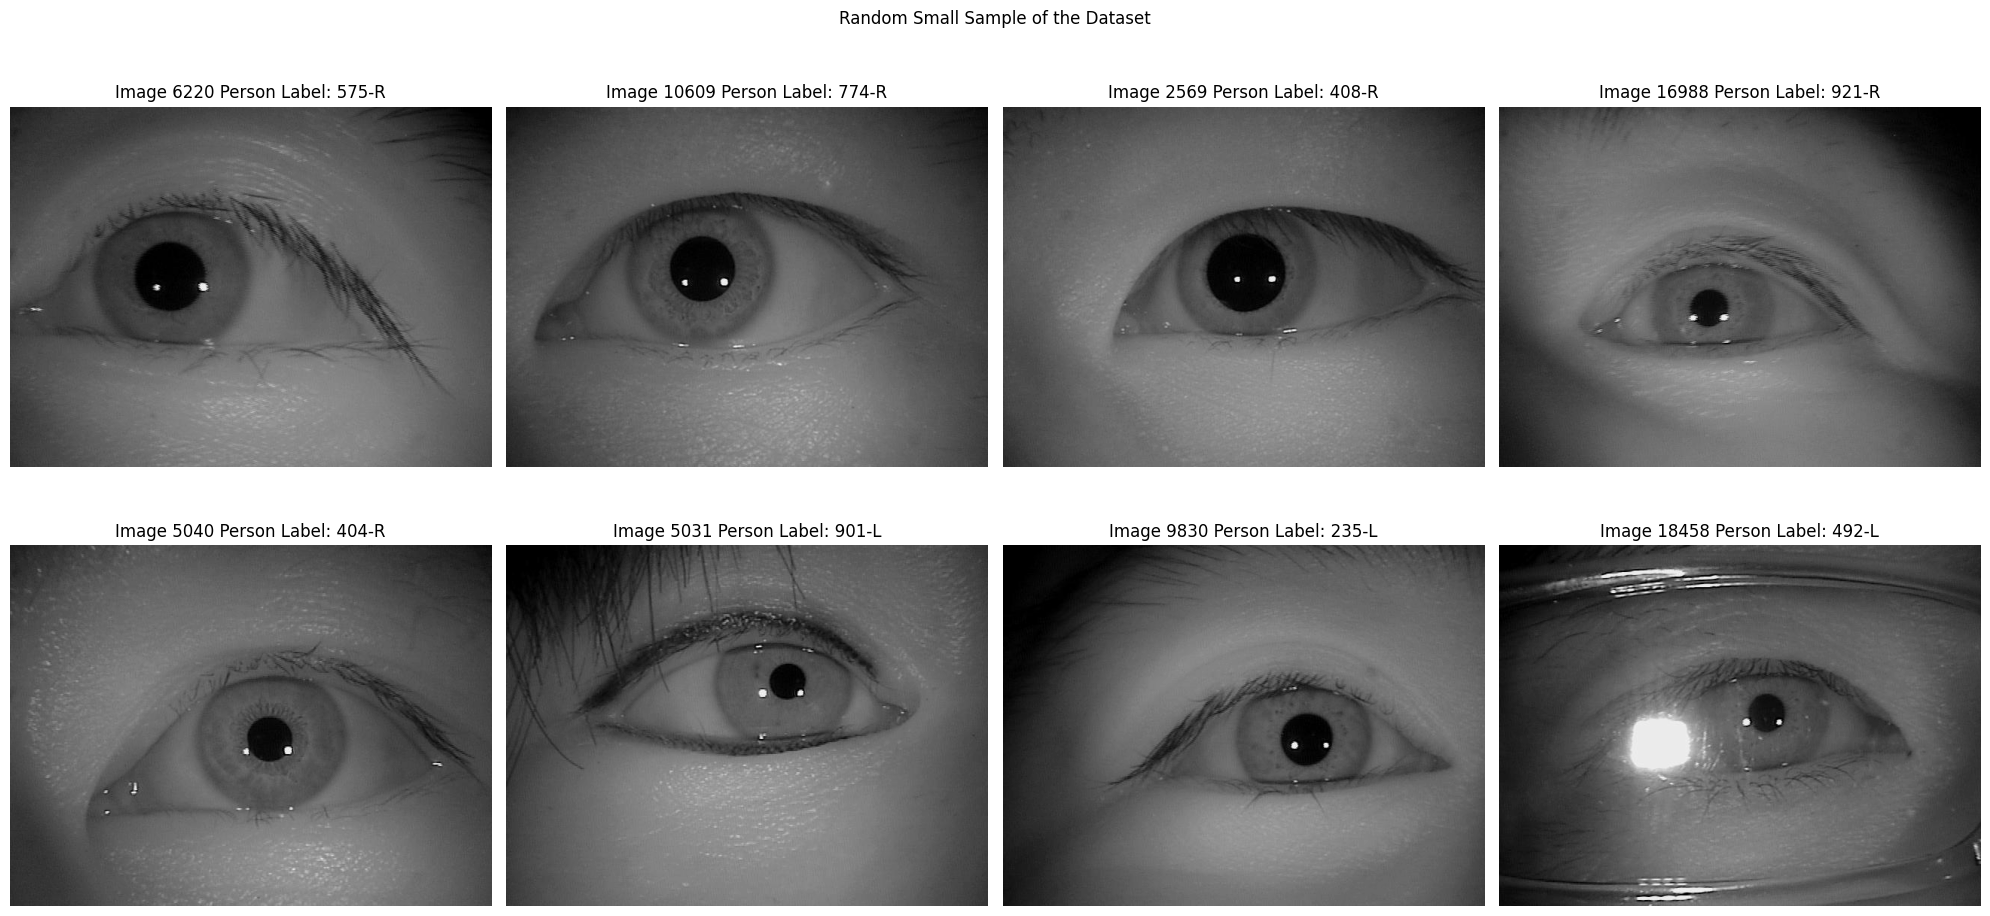

In [9]:
show_random_samples(df, 8)

It is noticed that this random image contains diffrent features of such subjects in which thta:
- Some eyes are left samples and some eyes are right samples.
- Some eyes have glasses.
- Some eyes uses eyeliner.
- Some eyes interval are big.
- Some eyes intervals are small.
- The images are greyscaled.

The width of the images:  640
The height of the images:  480
Shape (640, 480)


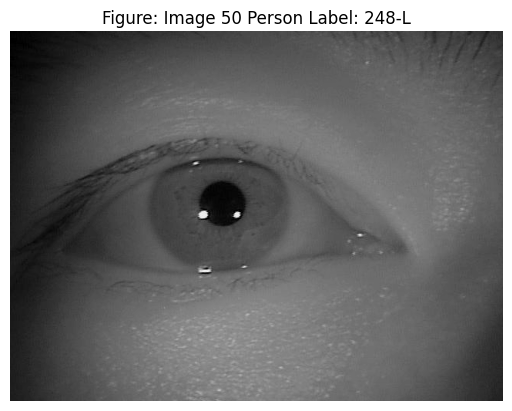

In [10]:
image_path =  df.loc[50, "ImagePath"]
image = PIL.Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Figure: Image {50} Person Label: {df.loc[50, 'Label']}")
plt.axis("off")
width, height = image.size
print("The width of the images: ", width)
print("The height of the images: ", height)
print("Shape", image.size)

##### Data Distrubutions
Let's take a look at the images sizes, aspect ratios and the labels distributions

- Calcutae sizes and aspect ratios:

In [11]:
image_sizes = []
aspect_ratios = []

for image_path in df['ImagePath']:
    image = PIL.Image.open(image_path)
    width, height = image.size
    image_sizes.append(width * height)
    aspect_ratios.append(width / height)

- Distribution of images sizes: The images sizes all are in standarized to the same size as the following figure shows that they are unformed:

Text(0, 0.5, 'Frequency')

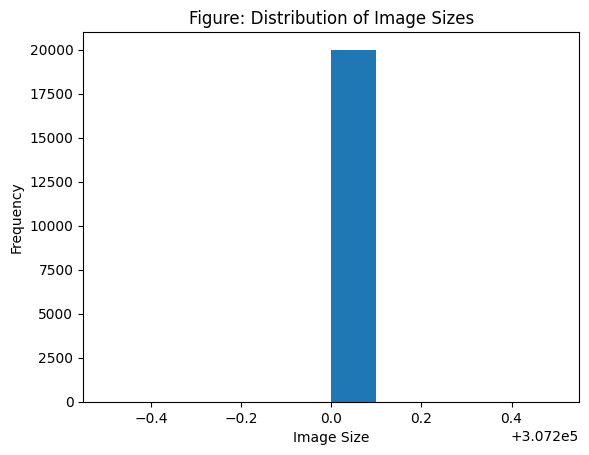

In [12]:
plt.hist(image_sizes, label="Image Size")
plt.title("Figure: Distribution of Image Sizes")
plt.xlabel("Image Size")
plt.ylabel("Frequency")

- Distribution of aspect ratios: let's just check teh aspect ratio if it's also the same. The follwing figure shows that they all have a unform aspect ratio which is 1.3:

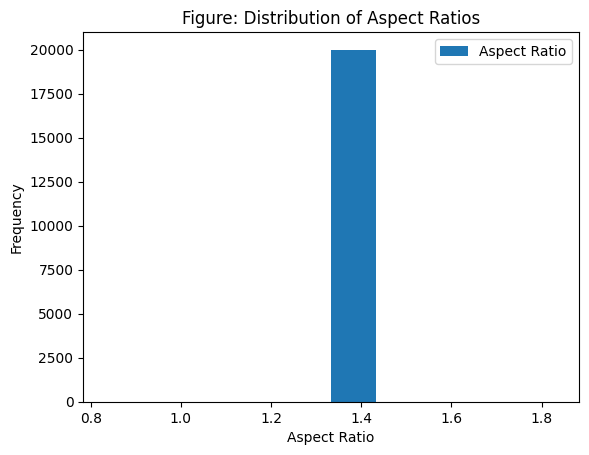

In [13]:
plt.hist(aspect_ratios, label="Aspect Ratio")
plt.title("Figure: Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.legend()

- Labels distribution visualizations: the follwing frequency treemap is used to show the labels distribution. We have also unformed distribution, as each label has the same value counts (10).

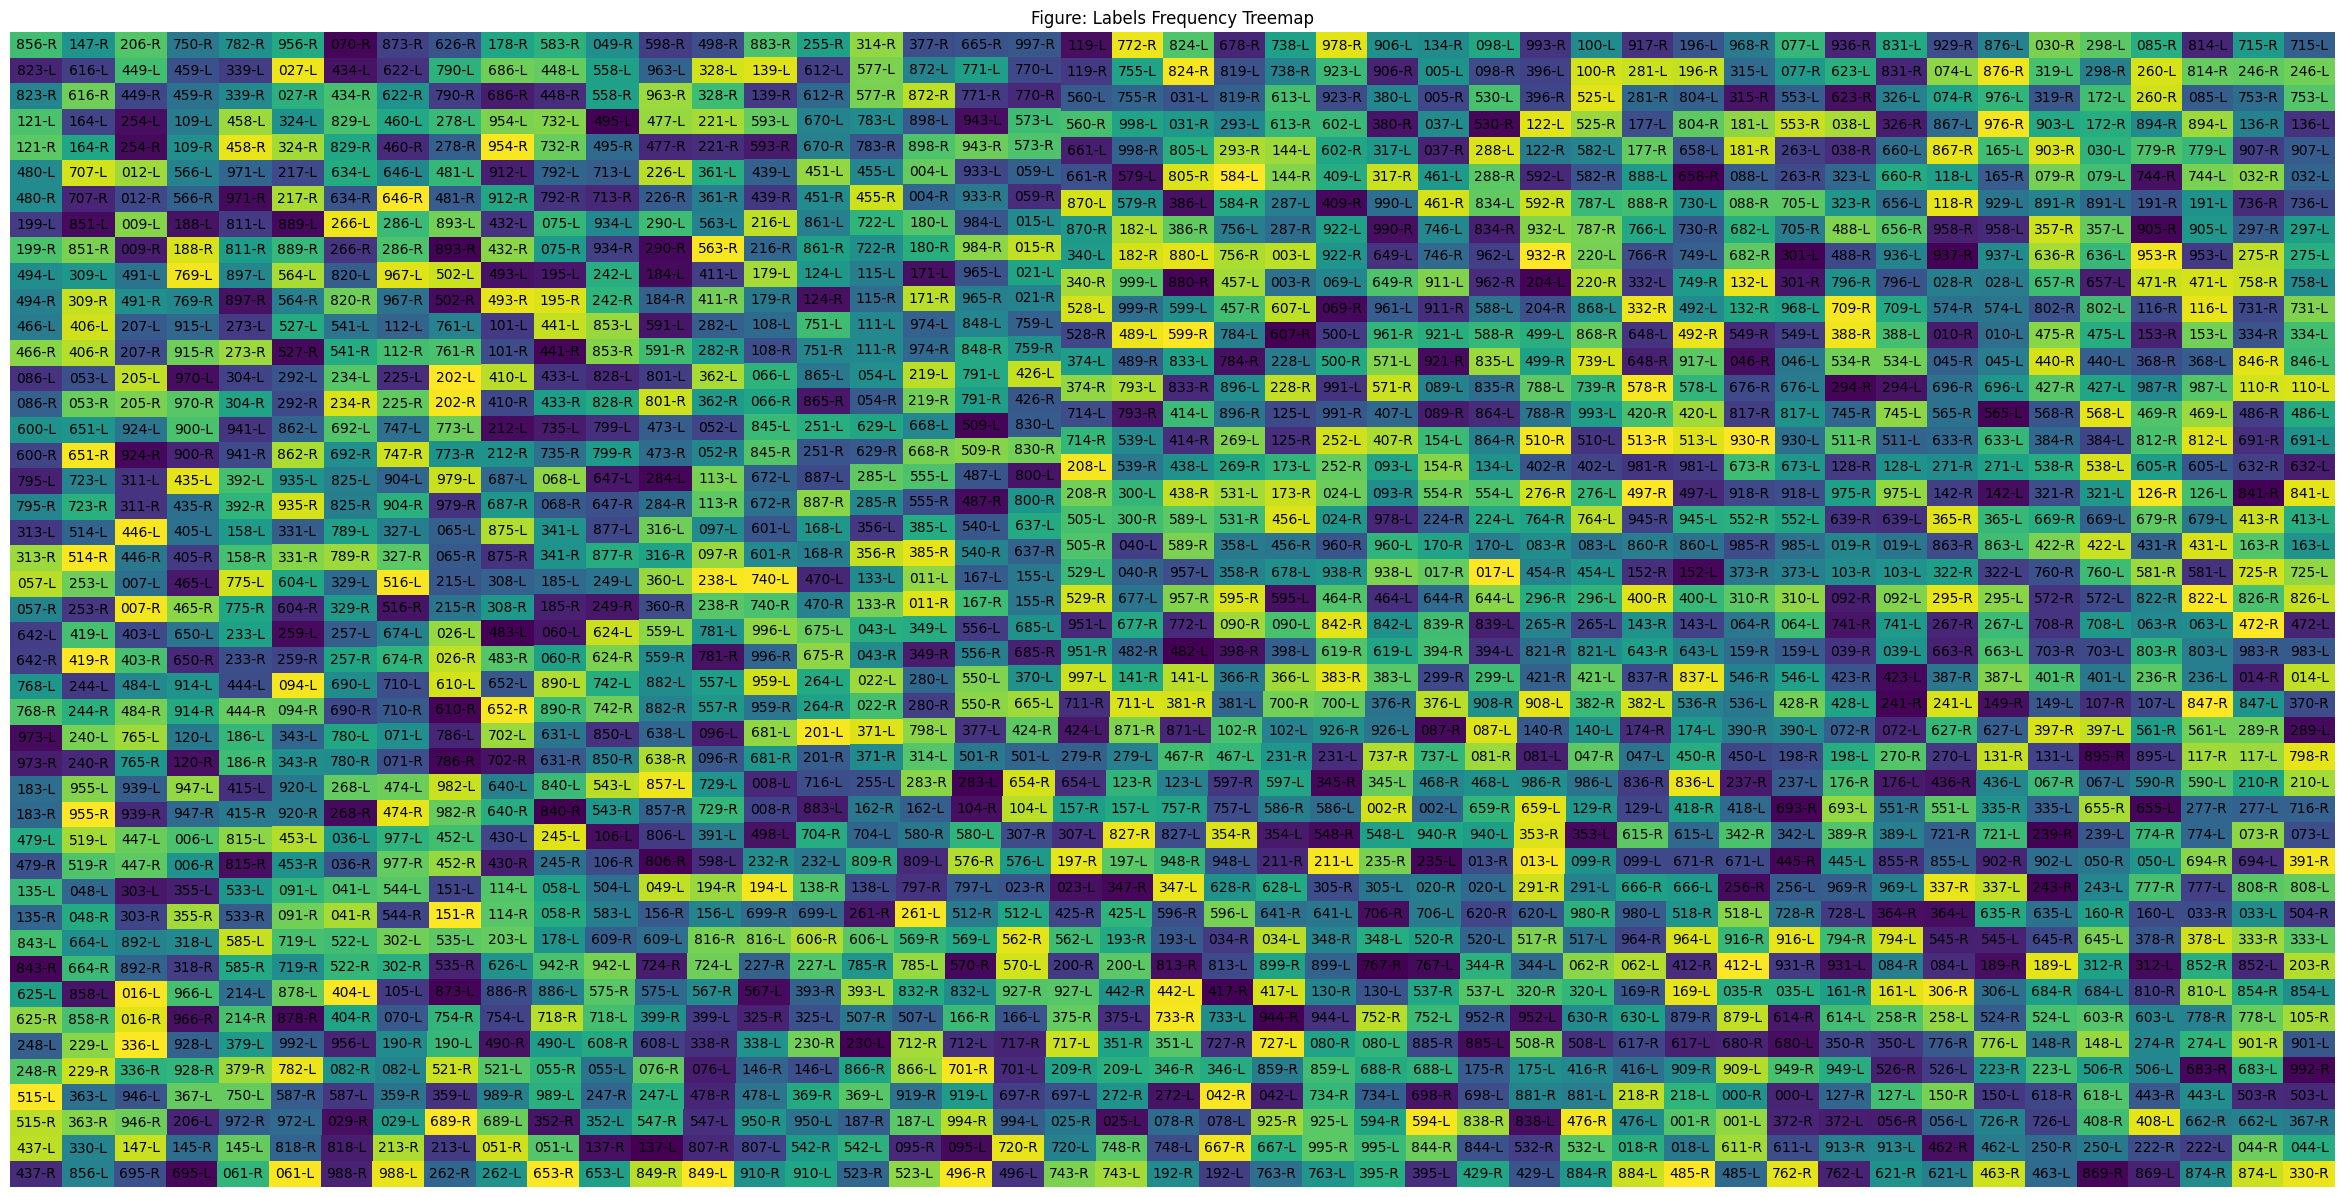

In [14]:
plt.figure(figsize=(30, 15))
squarify.plot(sizes=df['Label'].value_counts(), label=df['Label'].unique())
plt.axis('off')
plt.title('Figure: Labels Frequency Treemap')
plt.show()

- The dataset has balanced distributions, no missing or duplicated values are found. There will be minimum data prepartion decisions.

#### Preparing Dataset

##### Images preparing
- In the datset exploration, no missing images, and all the images have the same sizes and the same aspect ratios. However, due to processing resources limitations the decision is to resize all the images to a consistent size but smaller than that is now. The resizing algortihm is distortion free the sizes are changed but the aspect ratio is the same using pading values.

In [15]:
# Dataset Config
NUM_CLASSES = 2000
IMG_HEIGHT = 180
IMG_WIDTH = 180
NUM_CHANNELS = 1
SIZE = 20000

- Resizing is done with keeping the aspect ratio

In [16]:
def resize_keep_aspect_ration(img, target_height=IMG_HEIGHT, target_width=IMG_WIDTH, pad_value=255):
    """
    Resize an image to a specific size keeping the aspect ratio using padding
    """
    aspect_ratio = img.shape[1] / img.shape[0]
    
    ## Get the new sizes with keeping the aspect ratio
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    resized_img = cv2.resize(img, (new_width, new_height))
    
    ## Padding up and down so the image is in the middle
    preprocessed_img = np.full((target_height, target_width), pad_value, dtype=np.uint8)
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    preprocessed_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img
    
    return preprocessed_img

- The image preprocessing function will include:
    - Read with greyscale.
    - Resizing with keeping the aspcet ratio.
    - Normalization. [0, 1]
    - Hough transform for circle detection and cropping it (the IRIS)

In [17]:
def preprocess_image(img_dir):
    """
    Resizing imgaes with keeping the aspect ratio.
    Args:
        img_dir(str): Image path on the dataset
        target_height(int): the targeted height to be resized
        target_width(int): the targeted width to be resized
        pad_value(int): used as the padding value for the resized image
    Returns:
        preprocessed_img (cv.Imgae): processsed image
    """
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    img = resize_keep_aspect_ration(img)
    img = img/255.
    
    return img

- This is an example of performing image resizing output:

<function matplotlib.pyplot.show(close=None, block=None)>

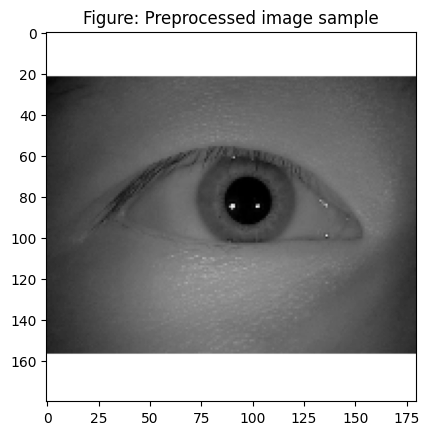

In [18]:
plt.imshow(preprocess_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("Figure: Preprocessed image sample")
plt.show

##### labels preparing:
- For the labels preparing for training, not much is needed. There was no missing values, However the datatype of the labels will be strings instead of numerical. The label will be considered as a string (person name) and that will be encoded. The distribution of the labels was also looked into and it was found that the labesl are equally distribuation and no customized data augmentation is needed. 

In [19]:
def preprocess_labels(df):
    """
    Prepares labels for training indluding transform to string and then encode.
    Args: 
        df(pd.DataFrame): dataset non-encoded labels and images paths
    Rteurns:
        labels(np.array): prepared labels for training
    """
    labels = df['Label'].astype(str)
    le = LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)
    return labels

- Example of preprocessing the labels into encoded labels:

In [20]:
print("Label after encoding: ", preprocess_labels(df)[120])
print("Label before encoding: ",df.iloc[120]['Label'])

Label after encoding:  959
Label before encoding:  479-R


- Split the dataset into trainig, testing and validation dataset. The splitting rule is 70:15:15

In [21]:
def split_dataset(preprocessed_images, preprocessed_labels, train_size=0.7, validation_size=0.15, shuffle=True):
    """
    Returns the splitted dataset using the 70:15:15 split rule
    Args:
        preprocessed_images()
        preprocessed_labels
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    np.random.seed(1190652)
    indices = np.arange(SIZE)
    if shuffle:
        np.random.shuffle(indices)
    
    train_samples = int(SIZE * train_size)
    validation_samples = int(SIZE * validation_size)
    
    train_indices = indices[:train_samples]
    validation_indices = indices[train_samples:train_samples + validation_samples]
    test_indices = indices[train_samples + validation_samples:]
    
    x_train  = preprocessed_images[train_indices]
    y_train = preprocessed_labels[train_indices]
    x_valid = preprocessed_images[validation_indices]
    y_valid = preprocessed_labels[validation_indices]
    x_test = preprocessed_images[test_indices]
    y_test = preprocessed_labels[test_indices]
    
    return x_train, x_valid, x_test, y_train, y_valid, y_test

- Dataset preparation for the training

In [22]:
def prepare_dataset(df):
    """
    Prepares the dataset to training and modeling
    Args:
        df(pd.DataFrame): the dataset
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    preprocessed_images = []
    for i in range(SIZE):
        image = preprocess_image(images[i])
        preprocessed_images.append(image)
    
    preprocessed_images = np.array(preprocessed_images).reshape(-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)
    preprocessed_labels = preprocess_labels(df)
    return split_dataset(preprocessed_images, preprocessed_labels)

In [23]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_dataset(df)
print("Triaing set size: ", x_train.shape)
print("Validation set size: ", x_valid.shape)
print("Testing set size: ",x_test.shape)

Triaing set size:  (14000, 180, 180, 1)
Validation set size:  (3000, 180, 180, 1)
Testing set size:  (3000, 180, 180, 1)


#### Data Augmentaion

In [24]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.1)
])
augmented_images = data_augmentation(x_valid)

- Here is an example of the augmented dataset

Encoded Person Label is: 1483


<function matplotlib.pyplot.show(close=None, block=None)>

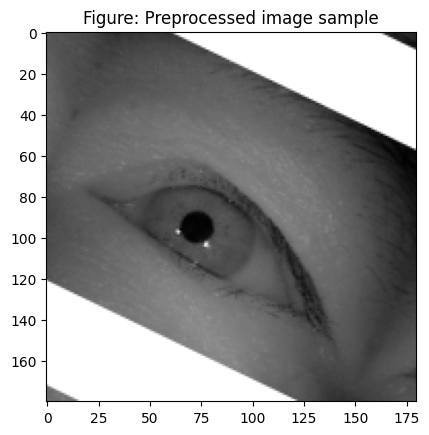

In [25]:
print(f'Encoded Person Label is: {y_valid[70]}')
plt.imshow(augmented_images[70], cmap="gray")
plt.title("Figure: Preprocessed image sample")
plt.show

<hr>

### Data modeling (The Verifier)

- Training Setup and configuration

In [26]:
# Training Config:
EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.01

loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
activation = "relu"
# optimizer = keras.optimizers.Adam(LEARNING_RATE)

#### Model Archeticticure:

In [27]:
def create_model(input_shape=(180, 180, 1),learning_rate=LEARNING_RATE, activation='leaky_relu'):
    """
    Takes two args: 
        (optimizer): to test on diffrent optimizers
        (activation): to test on diffrent activations
    Returns:
        (model) a model compiled with it's layers
    """
    padding = 'same'
    poolpadding = 'valid'
    
    model = Sequential([
        Input(input_shape),
        Conv2D(32, (5, 5), padding=padding, activation = activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.1),
        
        Conv2D(64, (5, 5), padding=padding, activation = activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.1),
        
        Conv2D(128, (5, 5), padding=padding, activation=activation),
        MaxPooling2D(pool_size=(1, 2), padding=poolpadding),
        Dropout(0.2),
        
        Conv2D(128, (3, 3), padding=padding),
        Activation(activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.25),
        
        Conv2D(256, (2, 2), padding=padding),
        Activation(activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.25),
        
        Conv2D(256, (1, 1), padding=padding),
        Activation(activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation=activation),
        Dense(2000, activation='softmax')  
    ],
    name="IRISRecognizer")
    model.compile(optimizer=optimizer,loss=loss, metrics=['accuracy'])

    return model

#### Model Training and testing:

In [28]:
model = create_model()
model.summary()

Model: "IRISRecognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 22, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 11, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 22, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 5, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 5, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 5, 256)     │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 11, 5, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │       258,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,187,536 (4.53 MB)

 Trainable params: 1,187,536 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(np.array(x_train), y_train, validation_data=(np.array(x_valid), y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100


I0000 00:00:1715212569.149636      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715212569.176176      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 2.6468e-04 - loss: 7.6036

W0000 00:00:1715212610.931888      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715212612.378356      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 94s 470ms/step - accuracy: 2.6486e-04 - loss: 7.6036 - val_accuracy: 0.0000e+00 - val_loss: 7.6035
Epoch 2/100


W0000 00:00:1715212620.578103      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 5.8462e-04 - loss: 7.6015 - val_accuracy: 0.0000e+00 - val_loss: 7.6068
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.0014 - loss: 7.5931 - val_accuracy: 0.0023 - val_loss: 7.3535
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.0056 - loss: 7.0367 - val_accuracy: 0.0153 - val_loss: 6.6005
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.0287 - loss: 5.9639 - val_accuracy: 0.0320 - val_loss: 6.1308
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.0614 - loss: 5.3088 - val_accuracy: 0.0413 - val_loss: 5.7486
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.0977 - loss: 4.7850 - val_accuracy: 0.0760 - val_loss: 5.5968
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.1542 - loss: 4.2995 - val_accuracy: 0.1287 - val_loss: 5.0672
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.2145 - los

#### Model Performance (Loss and Accuracy)

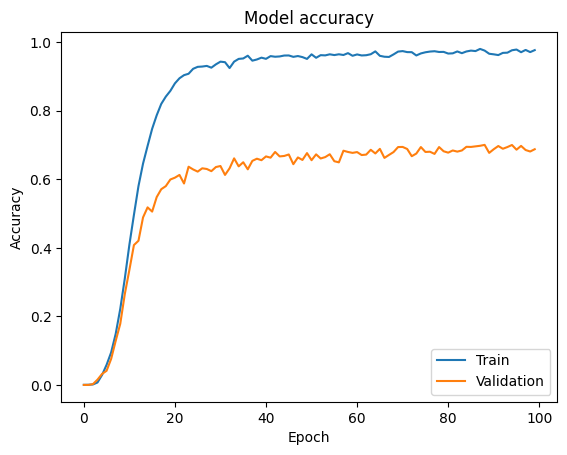

In [30]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

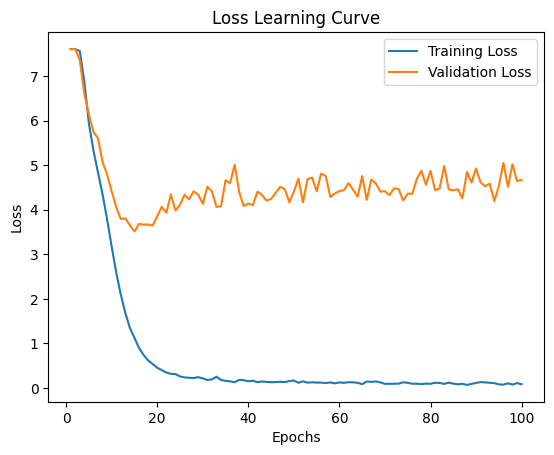

In [31]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Loss Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Testing

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

10/94 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7491 - loss: 4.2465

W0000 00:00:1715215052.369098      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.7035 - loss: 4.4163
Test accuracy: 69.933


W0000 00:00:1715215057.436381      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Predictions on sample images

In [33]:
def evaluate_model(dataset, model):
    class_names = df['Label'].unique()
    num_rows = 3
    num_cols = 6
    data_batch = dataset[0 : num_rows * num_cols]
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx], cmap="gray")

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)
    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


W0000 00:00:1715215066.475941      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Prediction accuracy:  0.0


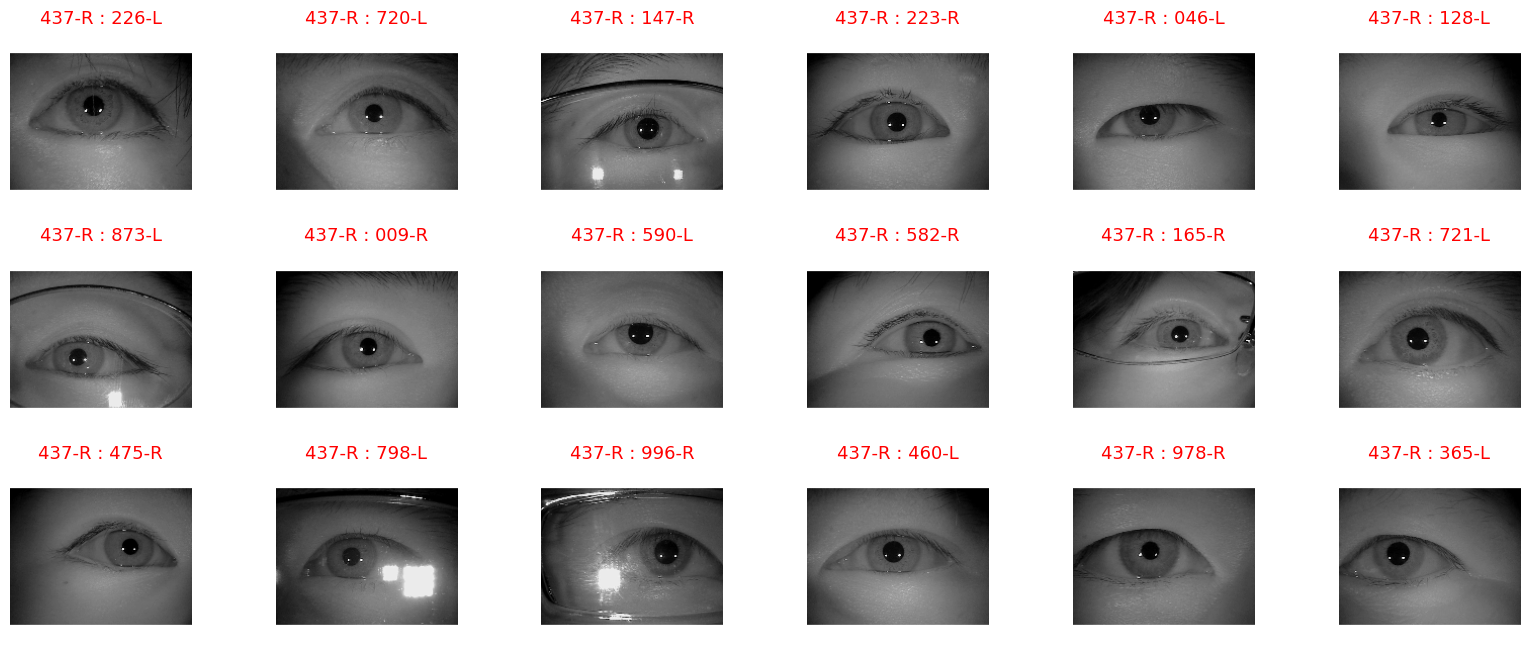

In [34]:
evaluate_model(x_test, model)

#### Model Evaluaion metrics:

- Confusion Matrix:

In [35]:
# cm = confusion_matrix(y_train, y_pred)

# print("Confusion Matrix:")
# print(cm)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted Negative", "Predicted Positive"],
#             yticklabels=["Actual Negative", "Actual Positive"])
# plt.title("Confusion Matrix Heatmap")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

- ROC Curve

In [36]:
# y_pred_prob = model.predict(np.array(x_test))
# y_pred_prob = y_pred_prob[:, 1]  # Extract probabilities for the positive class (class 1)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

<hr>

#### Model Exporting 
The environemnt which the model will be used to do infernece on is a mobile application environmnet. The form that the model is chosen to be exported into is tflite.

In [37]:
# import tensorflow as tf
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open('IRISRecognizer.tflite', 'wb') as f:
#     f.write(tflite_model)

- Convert to tflite:

In [38]:
# from tensorflow.keras import models
# reloaded_model_dropout = models.load_model('IRISRecognizer.tflite')
# test_loss, test_accuracy = reloaded_model_dropout.evaluate(np.array(x_test), y_test)
# print(f"Test accuracy: {test_accuracy*100:.3f}")

### User Experinece and GUI (The Authenticater)

#### Image Accuisition (for enrollment)

#### Image Preparing for Recognition

#### Model Inference

<hr>

## Conclusion

## Refrences
- [1] [Deep Learning for Iris Recognition: A Review, Yin, Y., He, S., Zhang, R., Chang, H., Han, X., & Zhang, J. (2024)](https://arxiv.org/abs/2303.08514)
- [2] https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
- [3] https://hycasia.github.io/dataset/casia-irisv4/
- [4] https://statisticallyrelevant.com/confusion-matrix-and-roc-curves/
- [5] https://www.researchgate.net/publication/327288671_The_Impact_of_Preprocessing_on_Deep_Representations_for_Iris_Recognition_on_Unconstrained_Environments